In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("Concrete_Data_Yeh.csv")

In [5]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


### Checking for null Values


In [7]:
df.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

 ### Here there is no null value in any column

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [9]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<Axes: >

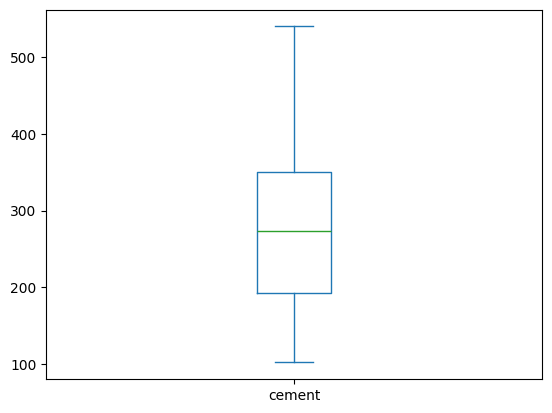

In [10]:
df["cement"].plot(kind="box")

### This is nearly normally distributed but not perfect normally distributed

<Axes: >

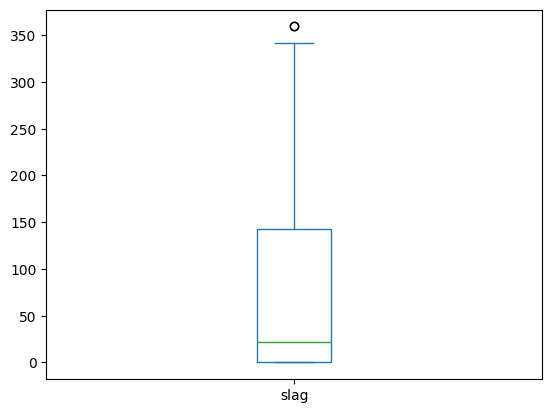

In [11]:
df["slag"].plot(kind="box")

### This is positively skewed graph because distance between median and max is greater

<Axes: >

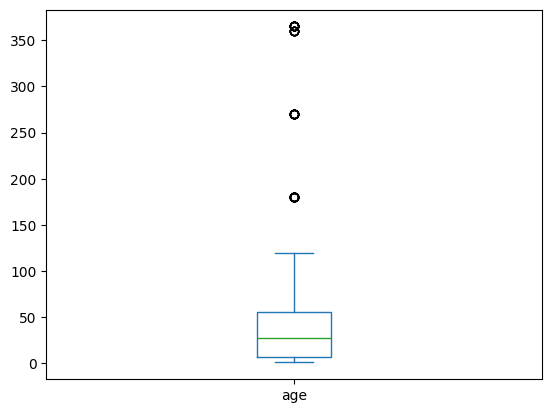

In [12]:
df["age"].plot(kind="box")

#### There is outlires in Age Data so we can remove it.

In [13]:
df["age"].quantile(0.95) #to chexk the data point at perticular percent

180.0

In [14]:
df["age"].quantile(0.75)

56.0

In [15]:
df["age"].quantile(0.5)

28.0

In [16]:

df["age"].quantile(0.85)

90.0

In [17]:
new_df=df[df["age"]<df["age"].quantile(0.85)]

<Axes: >

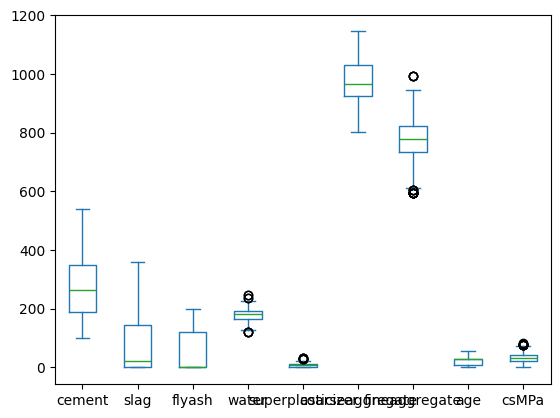

In [19]:
new_df.plot(kind="box")

#Standard Scalar data have std 1 and mean 0

In [20]:
new_df.shape

(840, 9)

<Axes: >

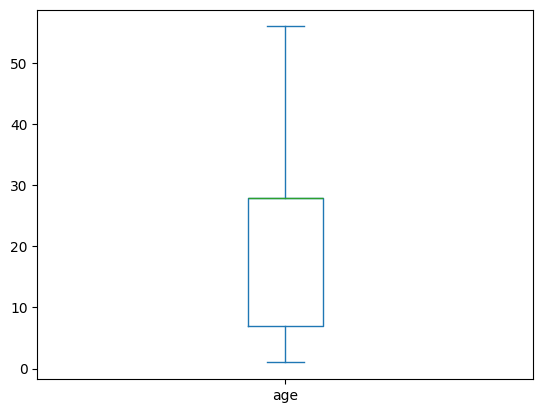

In [21]:
new_df["age"].plot(kind="box")

#### We can plot the graph of age acoording to new_df and the new_df data is leass than 90 

In [22]:
df["age"].value_counts()

age
28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: count, dtype: int64

In [23]:
new_df["age"].value_counts()

age
28    425
3     134
7     126
56     91
14     62
1       2
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

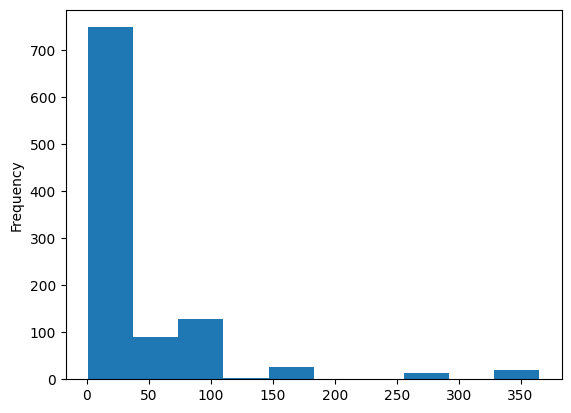

In [24]:
df["age"].plot(kind="hist")

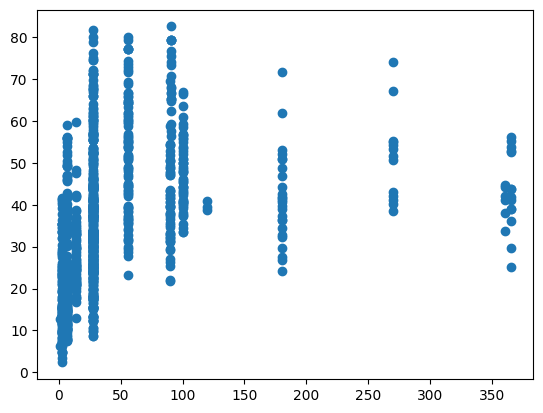

In [25]:
plt.scatter(df["age"],df["csMPa"])

In [26]:
np.corrcoef(df["age"],df["csMPa"])

array([[1.      , 0.328873],
       [0.328873, 1.      ]])

In [27]:
np.corrcoef(df["water"],df["csMPa"])

array([[ 1.        , -0.28963338],
       [-0.28963338,  1.        ]])

We can check the eroor array between water and csMPa 

In [28]:
df["water"].corr(df["csMPa"])

-0.2896333849853046

We can check the percentage of error

<Axes: >

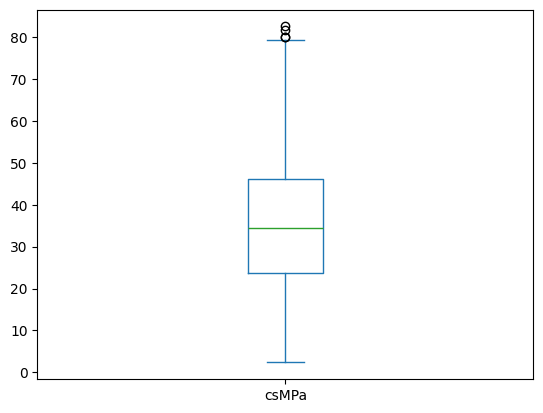

In [29]:
df["csMPa"].plot(kind="box")

#### We can also remove the outlires from "CsMPa" Column

In [40]:
df["csMPa"].quantile(0.97)

71.3416

In [41]:
new_df=df[df["csMPa"]<=df["csMPa"].quantile(0.97)]

<Axes: >

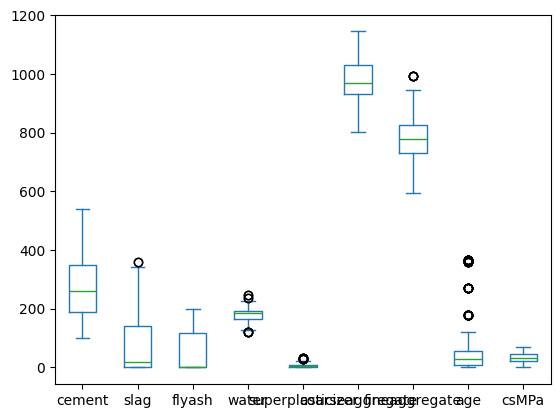

In [42]:
new_df.plot(kind="box")

<Axes: >

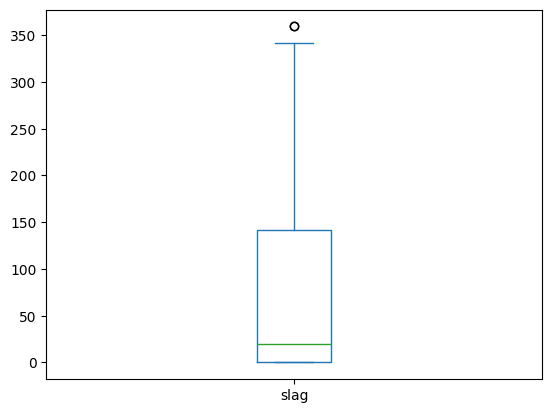

In [43]:
new_df["slag"].plot(kind="box")

In [44]:
new_df["slag"].quantile(0.995)

316.1

In [45]:
new_df=new_df[new_df["slag"]<=316.1]

<Axes: >

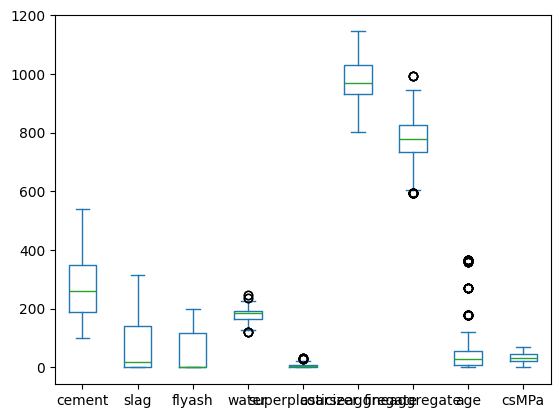

In [46]:
new_df.plot.box()

<Axes: >

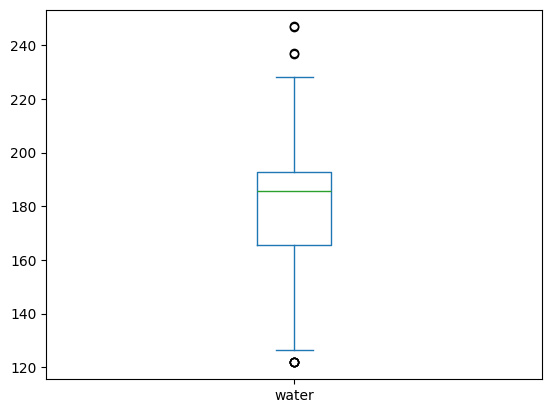

In [47]:
new_df["water"].plot.box()

In [48]:
new_df["water"].quantile(0.95)

228.0

In [49]:
new_df=new_df[new_df["water"]<new_df["water"].quantile(0.95)]

In [50]:
new_df["water"].quantile(0.015)

137.8

In [51]:
new_df=new_df[new_df["water"]>new_df["water"].quantile(0.015)]

<Axes: >

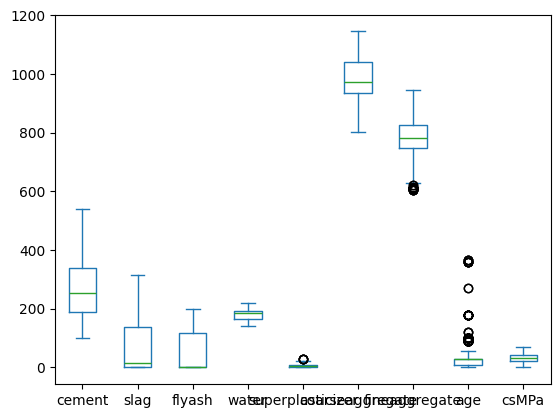

In [52]:
new_df.plot.box()

In [53]:
new_df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

<Axes: >

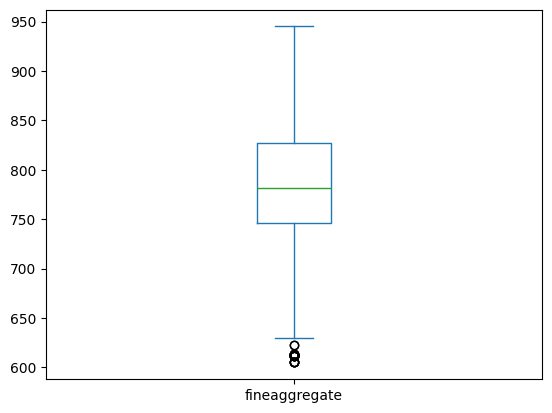

In [54]:
new_df["fineaggregate"].plot.box()

In [55]:
new_df["fineaggregate"].quantile(0.05)

635.85

In [56]:
new_df["fineaggregate"].corr(new_df["csMPa"])

-0.1631553103915589

In [57]:
new_df.drop("age",axis=1,inplace=True)

In [58]:
new_df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,csMPa
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,61.89
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,44.30
10,198.6,132.4,0.0,192.0,0.0,978.4,825.5,38.07
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28.02
16,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,39.36


In [59]:
X=new_df.drop("csMPa",axis=1)

In [60]:
y=new_df["csMPa"]

In [61]:
X.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5
10,198.6,132.4,0.0,192.0,0.0,978.4,825.5
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5
16,139.6,209.4,0.0,192.0,0.0,1047.0,806.9


In [62]:
y.head()

1     61.89
4     44.30
10    38.07
11    28.02
16    39.36
Name: csMPa, dtype: float64

## Linear Regression

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()

Standard Scalar can be influenced by outlires since it involves the estimation of empirical mean and std of each feature

In [65]:
X=scaler.fit_transform(X)

It is ued to fit the data into the model and transform it into a form that is more suitable in a single step.

In [66]:
X

array([[ 2.59645984, -0.80981247, -0.9130912 , ..., -0.67177893,
         0.99189017, -1.46593329],
       [-0.73263297,  0.75360749, -0.9130912 , ..., -1.12290055,
         0.01262983,  0.59863252],
       [-0.73263297,  0.75360749, -0.9130912 , ..., -1.12290055,
         0.01262983,  0.59863252],
       ...,
       [-1.22117295,  0.83626564,  0.77546114, ..., -0.0221638 ,
        -1.08680083, -0.0297136 ],
       [-1.1178092 ,  1.3947986 , -0.9130912 , ...,  0.91616916,
         0.1558115 ,  0.09319367],
       [-0.12512716,  0.37692247,  0.30434571, ...,  0.42895782,
        -1.4434766 , -0.28519498]])

In [67]:
X.shape

(920, 7)

In [68]:
y.shape

(920,)

In [69]:
from sklearn.model_selection import train_test_split

using train_test_split you can split the dataset into subsets that minimize the potential for bias in your evaluation and validation process

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=43)

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
lr=LinearRegression()

In [73]:
lr.fit(X_train,y_train)

LinearRegression()

In [74]:
y_pred=lr.predict(X_test)

predict is usedto process the image data

In [75]:
from sklearn.metrics import r2_score,mean_squared_error

In [76]:
r2 = r2_score(y_test,y_pred)

In [77]:
mean_squared_error(y_test,y_pred)

126.2776811392274

In [78]:
adj_r2=1-(((1-r2)*(len(X_test)-1))/(len(X_test)-7-1))

In [79]:
adj_r2

0.45536962166566797

In [80]:
r2

0.47620247766752766